# **Convolution Neural Network Implementation in Pytorch**

Welcome to Lab #2. In this you will implement *AlexNet, ResNet18, MobileNetV1 and MobileNetV2* and train them from scratch and train on the Cifar10 dataset.
You will learn to:
- Implement the well-known architectures and other details such as,
  - Data loader
  - Data augmentation
  - Model Implementation
  - Training procedure
  - Testing the performance
  - Store the weights

#Task overview
Implementing a classification model for CIFAR-10 classification is a common computer vision task that involves training a deep neural network to classify images from the CIFAR-10 dataset. We will work with specific architectures in the family of convolutional neural networks known for their excellent performance in image classification tasks.

Key Steps and Components:

  **1- Dataset Preparation:**
  Obtain the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes (e.g., airplanes, cars, cats, dogs, etc.).

  **2- Model Architecture:**
  - Implement the different architectures, which include AlexNet, ResNet18, MobileNetV1 and MobileNetV2.

**3- Data Preprocessing:** Normalize the image pixel values (e.g., mean subtraction and standardization) to ensure the model trains effectively.

**4- Training:**
 - Use a deep learning framework (e.g., PyTorch) to train the model on the training dataset.
 - Employ techniques like data augmentation (random rotations, flips, crops) to improve generalization.
 - Choose appropriate hyperparameters, such as learning rate, batch size, and optimizer (e.g., Adam, SGD).

# Important

1- Please complete all the tasks in this notebook. There are 15 tasks in total in this notebook

2- The tasks 11 and 13 in which you have to answer questions, please make sure to include answers for those questions in this notebook as well as in your lab report.

3- Please note that the final task 15 at the end of this notebook which asks you to train all the models on Cifar10 dataset and write the results in your report is the most important.





## 1-Packages ##
First, you may run the cell below to import all the necessary packages and assign an appropriate alias to each.
- [torch](https://pytorch.org/) is a high-performance yet simple to use framework for deep learning inplementation
- [torch.nn](https://pytorch.org/docs/stable/nn.html) is the basic block for graphs
- [torchvision](https://pytorch.org/vision/stable/index.html) is a package consists of popular datasets, model architectures, and common image transformations for computer vision.
- [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html#transforms-scriptability) is a set of common image transformations available in torchvision.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

Set PyTorch to use GPU if it is available

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Set training hyperparameters

###Task 1

In [3]:
#Task 1
num_epochs =  3000
learning_rate = 0.001 #Learning rate for the obtimization

batch_size= 64 # You may need to set the batch size appropriate for your device GPU

###Task 2

In [4]:
#Task 2
## You may need to design an appropriate data transform using torchvision.transform.
## The data transform must contain padding with size 4, RandomHorizontalFlip, RandomCrop, and ToTensor
## You may need to study torchvision reference attached above
### START CODE HERE ###
transform = transforms.Compose([transforms.Pad(4),
transforms.RandomHorizontalFlip(), transforms.RandomCrop(32),
transforms.ToTensor()])
### END CODE HERE ###

Load CIFAR10 dataset from torchvision and store in two subsets of train_dataset and test_dataset

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transforms.ToTensor())

  7%|▋         | 12.0M/170M [00:39<08:40, 305kB/s]


KeyboardInterrupt: 

Create data loaders for training and testing

###Task3

In [ ]:
#Task3
##Creat train_loader and test_loader using torch.utils.data.DataLoader
## batchsize for both loaders is the same
##data should be shuffled for train_loader
##data must not be shuffled for test_loader
### START CODE HERE ### (≈ 2 lines of code)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size, shuffle= False)
### END CODE HERE ###

#AlexNet

AlexNet is a groundbreaking deep convolutional neural network architecture introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012, which won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) with a significant margin. The architecture consists of 5 convolutional layers followed by 3 fully connected layers. It employs several key innovations, including ReLU (Rectified Linear Unit) activation functions, which accelerate training by reducing the problem of vanishing gradients, and dropout, which helps prevent overfitting by randomly dropping units during training. AlexNet also introduced data augmentation and local response normalization to further improve performance. The network’s success demonstrated the power of deep learning for image classification and paved the way for more advanced architectures.

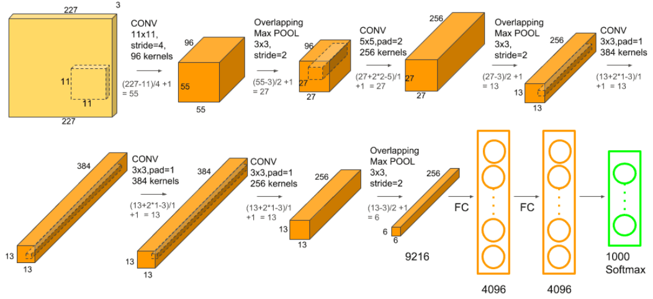

**Understanding nn.Sequential in PyTorch**

The **nn.Sequential** module in PyTorch is a convenient way to build a neural network by stacking layers in a linear sequence. This means that each layer is applied to the input data one after the other, in the order they are defined. It simplifies the process of creating a network by allowing you to compose complex models in a straightforward manner.

###TASK 4, 6 & 5: Complete the code in the cell below where instructed.

In [ ]:
# The original model is designed such that it will take only image of size 227x227
# So we change the kernel sizes and strides of the convolution layers in the model
# to work with our image size of 32x32 for Cifar dataset.
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        # Initialize the AlexNet model, with the number of output classes set to 15 (can be modified).
        super(AlexNet, self).__init__()

        # First convolutional layer: Input channels = 3 (RGB image), output channels = 96.
        # Convolution kernel size = 3x3, stride = 1, padding = 1 to preserve spatial dimensions.
        # BatchNorm2d normalizes the activations to speed up convergence.
        # ReLU is the activation function for non-linearity.
        # MaxPool2d reduces the spatial dimensions by 2x2 with a stride of 2.
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second convolutional layer: Input channels = 96, output channels = 256.
        # Again, using 3x3 convolution, followed by BatchNorm2d, ReLU, and MaxPooling.
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Third convolutional layer: Input channels = 256, output channels = 384.
        # Uses a 3x3 convolution, followed by BatchNorm2d and ReLU without pooling (to retain more spatial information).
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )

        # Fourth convolutional layer: Input channels = 384, output channels = 384.
        # Similar to layer 3, no pooling is applied.
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )

        #TASK 4: Based on the previous code please complete the code below
        # Fifth convolutional layer: Input channels = 384, output channels = 256.
        # Applies 3x3 convolution, followed by BatchNorm2d, ReLU, and MaxPooling for spatial reduction.

        ### CODE START HERE ###

        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2
        ))



        ### CODE END HERE ###

        #TASK 5:
        # There is a layer missing that has to be initialized here.
        # Please look at all the layers and see which layer is missing and then
        # initialize the layer below
        ### START CODE HERE ###
        self.flatten = nn.Flatten()
                                                  #(one line of code) Hint: The layer comes between convolutional and fully connected layers

        ### END CODE HERE ###

        # Fully connected layers (fc), each followed by Dropout and ReLU for regularization and non-linearity.
        # Dropout is applied to prevent overfitting by randomly zeroing some connections.
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),  # Maps the input features to 4096 neurons.
            nn.ReLU()
        )

        # Second fully connected layer, also with Dropout and ReLU.
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),  # Another 4096 neurons for representation.
            nn.ReLU()
        )

        # Final fully connected layer (fc2) maps the 4096 neurons to the number of output classes (e.g., 15 classes).
        self.fc2 = nn.Sequential(
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        #TASK 6
        # Pass the input through each convolutional and pooling layer sequentially.

        ### START CODE HERE ###
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)

        # Use the missing layer that you initialized in the constructor
        out = self.flatten(out)

        ### END CODE HERE ###

        # Pass through the fully connected layers.
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)

        # Output the final classification logits.
        return out


In [ ]:
from torchsummary import summary
image_size = 32
dummy_alexnet = AlexNet().to(device)
summary(dummy_alexnet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 32, 32]           2,688
       BatchNorm2d-2           [-1, 96, 32, 32]             192
              ReLU-3           [-1, 96, 32, 32]               0
         MaxPool2d-4           [-1, 96, 16, 16]               0
            Conv2d-5          [-1, 256, 16, 16]         221,440
       BatchNorm2d-6          [-1, 256, 16, 16]             512
              ReLU-7          [-1, 256, 16, 16]               0
         MaxPool2d-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 384, 8, 8]         885,120
      BatchNorm2d-10            [-1, 384, 8, 8]             768
             ReLU-11            [-1, 384, 8, 8]               0
           Conv2d-12            [-1, 384, 8, 8]       1,327,488
      BatchNorm2d-13            [-1, 384, 8, 8]             768
             ReLU-14            [-1, 38

**Expected**

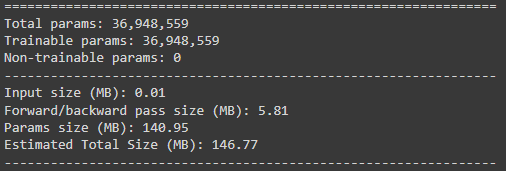

In [ ]:
model = AlexNet().to(device)

criterion = nn.CrossEntropyLoss() # The loss function used for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
from tqdm import tqdm

###Task 7

In [ ]:
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # You can see that we load the images and labels from the train_loader and transfer them to the proper device (GPU if available)
        # Now you need to pass the images through the model, calculate the loss and perform gradient descent on it
        # Please complete the code below
        #TASK 7

        ### START CODE HERE ###

        # Forward pass
        outputs = model(images)     # Apply the model
        loss = criterion(outputs, labels)           # Calculate the loss between the outputs and the labels by applying the "criterion" initialized

        # Backward and optimize
        optimizer.zero_grad() # out the gradients
        loss.backward()                     # Use the optimizer to calculate the gradients with the backward() function
        optimizer.step()                      # use the optimizer to update the parameters using the step() function

        ### END CODE HERE ###

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch [1/3000], Step [100/782] Loss: 2.1055
Epoch [1/3000], Step [200/782] Loss: 1.6579
Epoch [1/3000], Step [300/782] Loss: 1.8099
Epoch [1/3000], Step [400/782] Loss: 1.6260
Epoch [1/3000], Step [500/782] Loss: 1.6043
Epoch [1/3000], Step [600/782] Loss: 1.4449
Epoch [1/3000], Step [700/782] Loss: 1.4984


  0%|          | 1/3000 [00:27<23:06:31, 27.74s/it]

Epoch [2/3000], Step [100/782] Loss: 1.3666
Epoch [2/3000], Step [200/782] Loss: 1.2672
Epoch [2/3000], Step [300/782] Loss: 1.2338
Epoch [2/3000], Step [400/782] Loss: 1.5732
Epoch [2/3000], Step [500/782] Loss: 1.3985
Epoch [2/3000], Step [600/782] Loss: 1.5301
Epoch [2/3000], Step [700/782] Loss: 1.2888


  0%|          | 2/3000 [00:53<22:18:25, 26.79s/it]

Epoch [3/3000], Step [100/782] Loss: 1.3723
Epoch [3/3000], Step [200/782] Loss: 1.3344
Epoch [3/3000], Step [300/782] Loss: 1.2870
Epoch [3/3000], Step [400/782] Loss: 1.0015
Epoch [3/3000], Step [500/782] Loss: 0.9383
Epoch [3/3000], Step [600/782] Loss: 1.1469
Epoch [3/3000], Step [700/782] Loss: 1.0986


  0%|          | 3/3000 [01:18<21:25:27, 25.73s/it]

Epoch [4/3000], Step [100/782] Loss: 0.9965
Epoch [4/3000], Step [200/782] Loss: 1.2354
Epoch [4/3000], Step [300/782] Loss: 0.8891
Epoch [4/3000], Step [400/782] Loss: 1.1667
Epoch [4/3000], Step [500/782] Loss: 1.0551
Epoch [4/3000], Step [600/782] Loss: 1.1829
Epoch [4/3000], Step [700/782] Loss: 0.8190


  0%|          | 4/3000 [01:42<21:01:32, 25.26s/it]

Epoch [5/3000], Step [100/782] Loss: 0.7580
Epoch [5/3000], Step [200/782] Loss: 0.7834
Epoch [5/3000], Step [300/782] Loss: 1.0023
Epoch [5/3000], Step [400/782] Loss: 1.0023
Epoch [5/3000], Step [500/782] Loss: 1.3256
Epoch [5/3000], Step [600/782] Loss: 0.8314
Epoch [5/3000], Step [700/782] Loss: 0.8490


  0%|          | 5/3000 [02:07<20:46:39, 24.97s/it]

Epoch [6/3000], Step [100/782] Loss: 0.6559
Epoch [6/3000], Step [200/782] Loss: 0.9057
Epoch [6/3000], Step [300/782] Loss: 0.6253
Epoch [6/3000], Step [400/782] Loss: 1.3331
Epoch [6/3000], Step [500/782] Loss: 0.7945
Epoch [6/3000], Step [600/782] Loss: 0.6778
Epoch [6/3000], Step [700/782] Loss: 0.6934


  0%|          | 6/3000 [02:31<21:01:30, 25.28s/it]


KeyboardInterrupt: 

In [ ]:
model.eval()

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 72.82 %


## ResNet-18

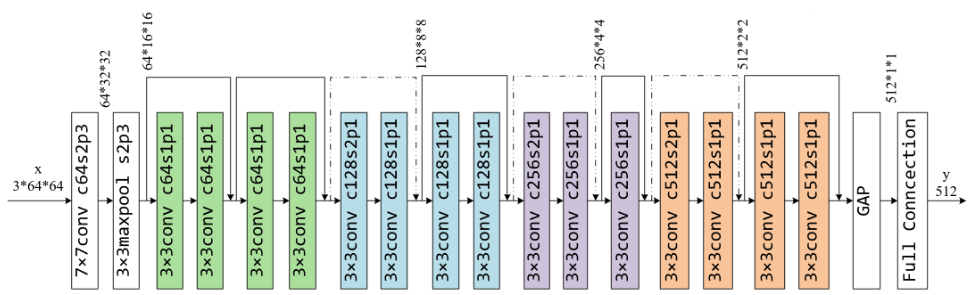

ResNet-18 is a deep convolutional neural network architecture that leverages residual learning to address the problem of vanishing gradients in very deep networks. Introduced as part of the ResNet (Residual Network) family, ResNet-18 features 18 layers, including convolutional, pooling, and fully connected layers. The key innovation in ResNet-18 is the use of residual blocks, which include shortcut connections that skip one or more layers. These shortcut connections add the input of the block to its output, allowing gradients to flow more easily through the network during training. This design mitigates the degradation problem that typically occurs as networks become deeper, enabling effective training of much deeper networks. ResNet-18 is characterized by its simplicity and efficiency, making it suitable for a wide range of image classification tasks.

###Task 8 Complete the code in the cell below as instructed in comments.

In [27]:
import torch
import torch.nn as nn

# Define the basic Residual Block used in ResNet
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        """
        ResBlock constructor to initialize layers for a basic residual block.

        Parameters:
        - in_channels: number of input channels (depth of input feature map).
        - out_channels: number of output channels (depth of output feature map).
        - downsample: a boolean flag. If True, downsample the input to match the size.
        """
        super().__init__()

        # If downsample is True, the stride is 2 for downsampling the feature maps.
        if downsample:
            # First convolution: downsampling with stride=2
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            # Shortcut connection to match dimensions, using a 1x1 convolution to adjust channels as well as the spatial size
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            # Shortcut is an identity connection if channel or spatial dimensions don't change
            if in_channels == out_channels:
                self.shortcut = nn.Identity()
            else:
                # If the channel dimensions are changing, use a 1x1 convolution to match channel dimensions
                self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels)
            )

        # Second convolution: no downsampling here, just a standard convolution
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)

        # Batch normalization for both convolutions
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # ReLU activation
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the ResBlock.

        Parameters:
        - x: the input feature map

        Returns:
        - The output after applying the convolutions, batch normalization, and residual addition.
        """
        #Task 8: Understand why and how various layers are initialized in the constructor of this class and then apply them
        #        in the proper sequence below.

        ### CODE START HERE ###

        # Store the shortcut connection, which could either be the identity or a downsampled version
        # Hint: Apply the shortcut layer on the input
        shortcut = self.shortcut(x)

        # First convolution -> batch norm -> ReLU
        x = self.relu(self.bn1(self.conv1(x)))

        # Second convolution -> batch norm -> ReLU
        x = self.bn2(self.conv2(x))

        # Add the shortcut (identity or downsampled) to the output of the convolutions
        x = x + shortcut

        # Apply final ReLU activation and return x
        x = self.relu(x)
        ### CODE END HERE ###
        return x

In [28]:
resblock_class = ResBlock( 3, 4, True)

In [29]:
resblock_class

ResBlock(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (shortcut): Sequential(
    (0): Conv2d(3, 4, kernel_size=(1, 1), stride=(2, 2))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)

###Task 9 & 10 Complete the code in the cell below where instructed in comments.

In [30]:
# Define ResNet18 using ResBlock
class ResNet18(nn.Module):
    def __init__(self, in_channels, resblock, n_outputs=10):
        """
        Constructor for ResNet18.

        Parameters:
        - in_channels: number of input channels (e.g., 3 for RGB images).
        - resblock: the residual block class.
        - outputs: the number of classes for the final output (default: 15).
        """
        super().__init__()


        # Initial layers of the ResNet with a 7x7 convolution followed by max-pooling
        self.layer0 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1), # First convolution with large kernel
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),               # Max pooling to downsample
            nn.BatchNorm2d(64),                                             # Batch normalization
            nn.ReLU()                                                       # ReLU activation
        )

        # First set of residual blocks, no downsampling in spatial size (stride=1)
        self.layer1 = nn.Sequential(
            resblock(64, 64, downsample=False),  # First ResBlock
            resblock(64, 64, downsample=False)   # Second ResBlock
        )

        # Second set of residual blocks, downsample with stride 2 (half the spatial dimensions) and
        # increase the number of channels by 2 from 64 to 128
        self.layer2 = nn.Sequential(
            resblock(64, 128, downsample=True),  # First ResBlock with downsampling (stride=2)
            resblock(128, 128, downsample=False) # Second ResBlock without downsampling
        )

        #Task 9: Taking the self.layer2 as an example complete the code for self.layer3
        #and self.layer4 below based on the given information like number of channels

        ### START CODE HERE ###

        # Third set of residual blocks, downsample to 256 channels
        self.layer3 = nn.Sequential(
            resblock(128, 256, downsample= True),
            resblock(256,256, downsample = False)  # First ResBlock with downsampling, increase channels from 128 to 256
                                                  # Second ResBlock without downsampling, channel size 256
        )

        # Fourth and final set of residual blocks, downsample to 512 channels
        self.layer4 = nn.Sequential(
            resblock(256,512, downsample = True),
            resblock(512,512, downsample = False))
                                                  # First ResBlock with downsampling, increase channels from 256 to 512, gör mer komplexa mönster
                                                  # Second ResBlock without downsampling, channel size 512, ändrar inte storlek och shortcut är ren

        ### END CODE ###

        # Global Average Pooling to reduce the feature map to size (1,1)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))

        # Flatten the feature map to a 1D vector
        self.flatten = nn.Flatten()

        # Fully connected layer for classification, outputs a vector of length `outputs`
        self.fc = nn.Linear(512, n_outputs)

    def forward(self, input):
        """
        Forward pass for ResNet18.

        Parameters:
        - input: input image tensor

        Returns:
        - Output of the model (logits for classification).
        """

        #Task 10: Understand why and how various layers are initialized in the constructor of this class and then apply them
        #        in the proper sequence below.

        ### START CODE HERE ###
        # Pass through the initial convolutional layer and pooling layer0 in this case
        input = self.layer0(input)

        # Pass through each set of residual blocks, the layers after layer0
        input = self.layer1(input)
        input = self.layer2(input)
        input = self.layer3(input)
        input = self.layer4(input)

        # Global Average Pooling to convert (batch_size, 512, H, W) to (batch_size, 512, 1, 1)
        input = self.gap(input)

        # Flatten the output to (batch_size, 512)
        input = self.flatten(input)

        # Final fully connected layer for classification
        input = self.fc(input)
        ### END CODE ###
        return input

###Task 11 Please answer the following questions from the cell above.

Q.i: In the above cell what does the "**self.gap**" layer represent? With which function is it initialized by and why?

Answer.i: Tar ett medelvärde över varje feature map och gör den till 1×1. Används för att minska dimensionen innan klassificering och minska antal parametrar.

Q.ii: In the above cell what does the "**self.flatten**" layer represent? With which function is it initialized by and why?

Answer.ii: Gör om en 2D/3D tensor till en 1D-vektor så att den kan skickas in i fully connected layer.

Q.iii: Why are we using the **self.fc** layer at the end of the network? What is its purpose?

Answer.iii: Gör själva klassificeringen genom att omvandla vektorn till ett score per klass.

Q.iv: **Important** You might have learnt in the lectures that in classification tasks involving multiple classes we generally use the softmax function but in this case we are not using it. Could you explain why?

Answer.iv: För att CrossEntropyLoss redan innehåller softmax, därför används den inte separat.

In [31]:
from torchsummary import summary
image_size = 32
dummy_model = ResNet18(3, ResBlock, 10).to(device)
summary(dummy_model, (3, image_size, image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
         MaxPool2d-2           [-1, 64, 16, 16]               0
       BatchNorm2d-3           [-1, 64, 16, 16]             128
              ReLU-4           [-1, 64, 16, 16]               0
          Identity-5           [-1, 64, 16, 16]               0
            Conv2d-6           [-1, 64, 16, 16]          36,928
       BatchNorm2d-7           [-1, 64, 16, 16]             128
              ReLU-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          36,928
      BatchNorm2d-10           [-1, 64, 16, 16]             128
             ReLU-11           [-1, 64, 16, 16]               0
         ResBlock-12           [-1, 64, 16, 16]               0
         Identity-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

Expected Output:

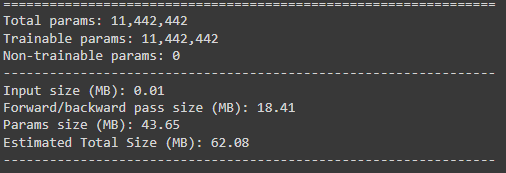

# Mobile NetV1

MobileNetV1 introduces depthwise separable convolutions as a key architectural innovation to improve computational efficiency and reduce model size. This technique decomposes a standard convolution into two distinct layers: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a single convolutional filter per input channel, capturing spatial features with lower computational cost. Subsequently, the pointwise convolution, which is a 1x1 convolution, combines these features across channels, enabling the network to learn complex combinations of the extracted features. By separating the convolutional process into these two steps, MobileNetV1 significantly reduces the number of parameters and computational load, making it well-suited for mobile and embedded devices where resources are limited.

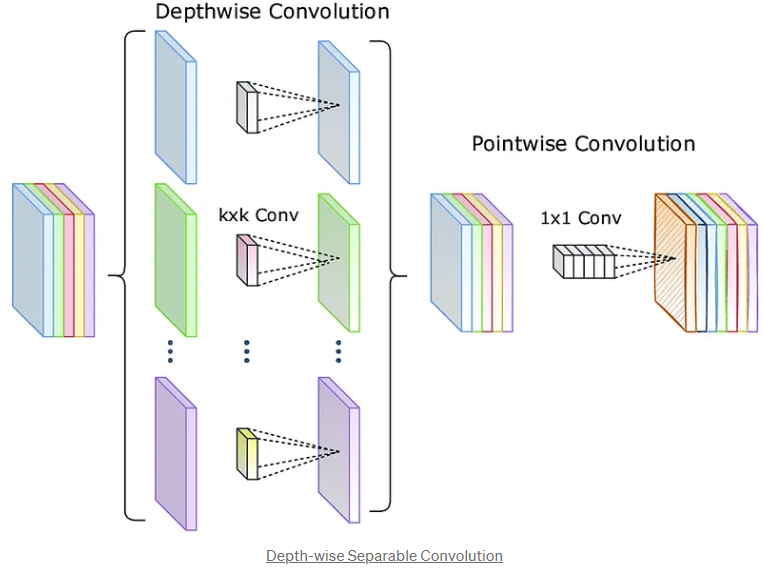

Given below is the complete architecture of MobileNetV1. The number classes at the end of the network is 1000 for ImageNet while in our case its going to be 10 for Cifar10.

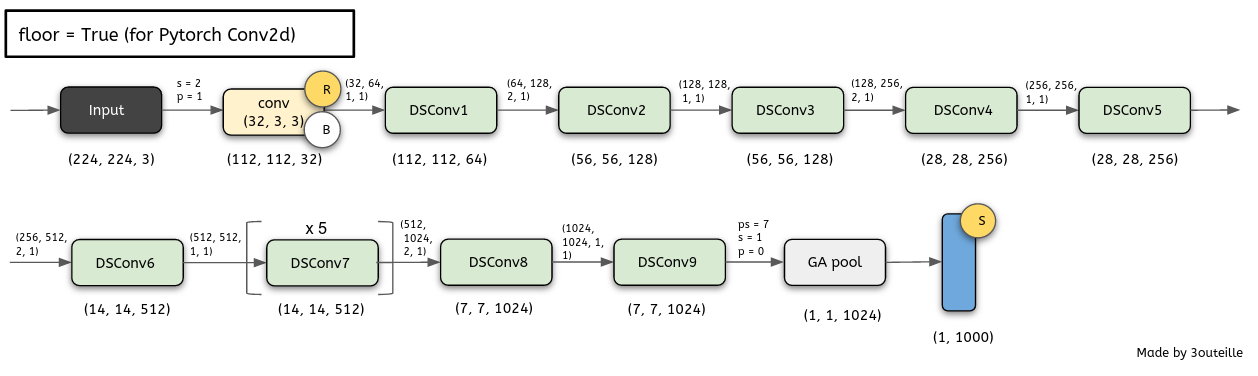

###Task 12 Complete the code in the cell below as instructed in comments.

In [34]:
class MobileNetV1(nn.Module):
    def __init__(self, ch_in, n_classes):
        super(MobileNetV1, self).__init__()

        def conv_bn(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True)
                )

        def conv_dw(inp, oup, stride):
            return nn.Sequential(
                # dw
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),

                # pw
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
                )

        self.model = nn.Sequential(
            conv_bn(ch_in, 32, 2),
            conv_dw(32, 64, 1),
            conv_dw(64, 128, 2),
            conv_dw(128, 128, 1),
            conv_dw(128, 256, 2),
            conv_dw(256, 256, 1),
            conv_dw(256, 512, 2),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 1024, 2),
            conv_dw(1024, 1024, 1),
            nn.AdaptiveAvgPool2d(1)
        )
        self.fc = nn.Linear(1024, n_classes)

    def forward(self, x):
        # TASK 12: Understand the initialized layers in the constructor of this class and complete the code given below.

        ### START CODE HERE ###
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        ### END CODE HERE ###
        return x



**TASK 13:** Please answer the following questions:

**Question i**: What does the "x.view(-1, 1024)" do in the above cell? Why are we using it?

**Answer.i**:Gör om output till en platt vektor så den kan skickas in i ett fullt kopplat lager.

**Question ii**: In the depth-wise separable convolution block (conv_dw function in the above cell) we perform first the depth-wise convolution and then the pointwise, but for the both the operations we are using the Conv2d layer of pytorch, how is Conv2d used for both the operations. What is the difference between the two usages?

**Answer.ii**:Depthwise jobbar kanal-för-kanal, pointwise (1×1) blandar kanaler och ändrar antal kanaler.

**Question iii**: What is the **nn.AdaptiveAvgPool2d(1)** function doing in the above code?

**Answer.iii**: Krymper varje feature map till 1×1 genom att ta medelvärdet.

In [35]:
from torchsummary import summary
image_size = 32
dummy_mobilenet = MobileNetV1(ch_in=3, n_classes=10).to(device)
summary(dummy_mobilenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]             864
       BatchNorm2d-2           [-1, 32, 16, 16]              64
              ReLU-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]             288
       BatchNorm2d-5           [-1, 32, 16, 16]              64
              ReLU-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 64, 16, 16]           2,048
       BatchNorm2d-8           [-1, 64, 16, 16]             128
              ReLU-9           [-1, 64, 16, 16]               0
           Conv2d-10             [-1, 64, 8, 8]             576
      BatchNorm2d-11             [-1, 64, 8, 8]             128
             ReLU-12             [-1, 64, 8, 8]               0
           Conv2d-13            [-1, 128, 8, 8]           8,192
      BatchNorm2d-14            [-1, 12

**Expected**

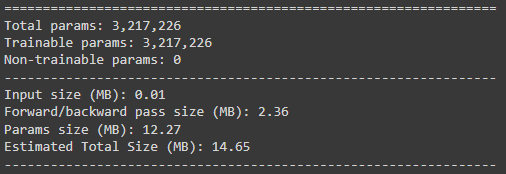

# Mobile NetV2

MobileNetV2 builds upon the ideas of its predecessor, MobileNetV1, by introducing several key enhancements to improve performance and efficiency.

**Depthwise Separable Convolutions:**

**Depthwise Convolution:** Applies a single convolutional filter per input channel, which reduces the computational cost compared to standard convolutions.

**Pointwise Convolution:** A 1x1 convolution applied after the depthwise convolution to combine the outputs from the depthwise layer.

**Inverted Residuals:**
MobileNetV2 introduces an efficient neural network architecture using an innovative concept called inverted residuals, which combines depthwise separable convolutions with linear bottlenecks. The core of MobileNetV2's design is the inverted residual block, which first expands the input channels using a lightweight 1x1 convolution (expansion phase) to increase the feature dimensionality. This is followed by a depthwise separable convolution that applies spatial filters independently to each channel, and then a 1x1 convolution is used again to project the features down to a reduced number of channels (projection phase). The expansion phase effectively increases the capacity of the network while keeping the computational cost manageable, and the depthwise separable convolutions help in reducing the overall computational complexity while preserving the rich feature representations.
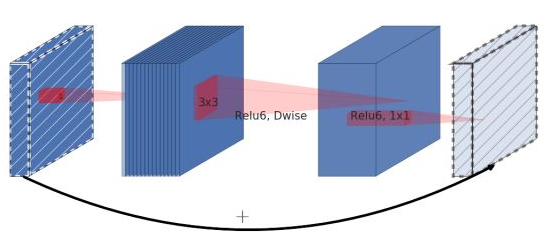

**Overall Architecture**

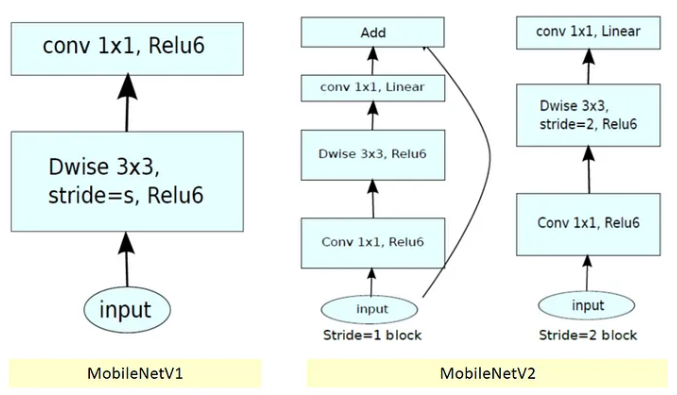

###Task 14 Complete the cell below as instructed in comments.

In [40]:
import math
import torch.nn as nn

def conv_3x3_bn(inp, oup, stride):
    """
    Constructs a 3x3 convolution followed by BatchNorm and ReLU6 activation.
    :param inp: Number of input channels.
    :param oup: Number of output channels.
    :param stride: The stride of the convolution.
    :return: A sequential module containing conv, bn, and ReLU6 layers.
    """
    return nn.Sequential(
        nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
        nn.BatchNorm2d(oup),
        nn.ReLU6(inplace=True)
    )

def conv_1x1_bn(inp, oup):
    """
    Constructs a 1x1 convolution followed by BatchNorm and ReLU6 activation.
    :param inp: Number of input channels.
    :param oup: Number of output channels.
    :return: A sequential module containing conv, bn, and ReLU6 layers.
    """
    return nn.Sequential(
        nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
        nn.BatchNorm2d(oup),
        nn.ReLU6(inplace=True)
    )

class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        """
        InvertedResidual block as used in MobileNetV2.
        :param inp: Number of input channels.
        :param oup: Number of output channels.
        :param stride: The stride of the depthwise convolution.
        :param expand_ratio: The ratio to expand the input channels.
        """
        super(InvertedResidual, self).__init__()
        assert stride in [1, 2]

        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup

        if expand_ratio == 1:
            # When expand ratio is 1, perform depthwise convolution only.
            self.conv = nn.Sequential(
                # Depthwise convolution
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Pointwise convolution
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            # Expand and then perform depthwise convolution followed by pointwise convolution.
            self.conv = nn.Sequential(
                # Pointwise convolution (expand)
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Depthwise convolution
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Pointwise convolution (linear)
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )

    def forward(self, x):
        """
        Forward pass for the InvertedResidual block.
        :param x: Input tensor.
        :return: Output tensor.
        """
        if self.identity:
            return x + self.conv(x)  # Skip connection
        else:
            return self.conv(x)

class MobileNetV2(nn.Module):
    def __init__(self, num_classes=1000,):
        """
        MobileNetV2 model initialization.
        :param num_classes: Number of output classes.
        """
        super(MobileNetV2, self).__init__()
        # Configuration of inverted residual blocks (expand_ratio, output_channels, num_blocks, stride)
        self.cfgs = [
            [1,  16, 1, 1],
            [6,  24, 2, 2],
            [6,  32, 3, 2],
            [6,  64, 4, 2],
            [6,  96, 3, 1],
            [6, 160, 3, 2],
            [6, 320, 1, 1],
        ]

        # Building the initial layer
        input_channel = 32
        layers = [conv_3x3_bn(3, input_channel, 2)]

        # Adding inverted residual blocks
        block = InvertedResidual
        for t, c, n, s in self.cfgs:
            output_channel = c
            for i in range(n):
                layers.append(block(input_channel, output_channel, s if i == 0 else 1, t))
                input_channel = output_channel

        # Sequentially add all layers to the model
        self.features = nn.Sequential(*layers)

        # Building the final layers
        output_channel = 1280
        self.conv = conv_1x1_bn(input_channel, output_channel)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Linear(output_channel, num_classes)

        self._initialize_weights()

    def forward(self, x):
        """
        Forward pass for the MobileNetV2 model.
        :param x: Input tensor.
        :return: Output tensor.
        """
        #Task 14: Please understand how diferent layers havae been initialized in the constructor of this class and
        #         then apply all the layers as instructed here.
        ### START CODE HERE ###
        x = self.features(x)     # Pass through feature extractor layers
        x = self.conv(x)    # Pass through final convolution layer
        x = self.avgpool(x)      # Apply adaptive average pooling
        x = x.view(x.size(0), -1)  # Flatten the tensor for the classifier
        x = self.classifier(x)      # Pass through the classifier
        ### END CODE HERE ###
        return x

    def _initialize_weights(self):
        """
        Initialize the weights of the model layers.
        :return: None
        """
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, 0.01)
                m.bias.data.zero_()


In [41]:
from torchsummary import summary
image_size = 32
dummy_mobilenet = MobileNetV2(10).to(device)
summary(dummy_mobilenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]             864
       BatchNorm2d-2           [-1, 32, 16, 16]              64
             ReLU6-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]             288
       BatchNorm2d-5           [-1, 32, 16, 16]              64
             ReLU6-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 16, 16]             512
       BatchNorm2d-8           [-1, 16, 16, 16]              32
  InvertedResidual-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 96, 16, 16]           1,536
      BatchNorm2d-11           [-1, 96, 16, 16]             192
            ReLU6-12           [-1, 96, 16, 16]               0
           Conv2d-13             [-1, 96, 8, 8]             864
      BatchNorm2d-14             [-1, 9

**Expected**

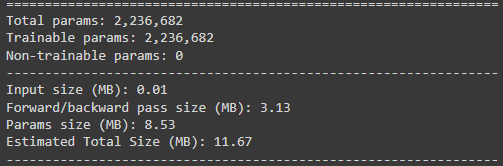

# Important Task 15

In this lab you have implemented and trained the AlexNet model on Cifar10 and also implemented the ResNet18, MobileNetV1 and MobileNetV2 models. Your final task is to also train ResNet18, MobileNetV1 and MobileNetV2 models on the Cifar10 dataset and make a table for showing the following columns for all the models (AlexNet included):

Model Name -  No. of Parameters - Total Size (MB) - Test Accuracy

Please discuss the pros and cons of different models and their performances.

**You should represent all the results and discussion of Task 15 in your Lab Report**

Thank you.

# Instructions for Lab Report

You should provide all results of task 15 and the related discussion in the lab report.

Moreover please answer the following questions provided below in the lab report. Please understand the questions and there answers well because in addition to the lab your viva will also be based on the topics discussed in these questions so make sure to understand what you provide. Thank you and best of luck.

###Section A: Architectural Mechanics & Evolution
**Q1.** AlexNet uses aggressive pooling and large strides early in the network to reduce spatial dimensions, ending with massive Fully Connected (Dense) layers. In contrast, ResNet and MobileNets utilize Global Average Pooling (GAP) before the final classifier. Discuss the impact of replacing flattening+dense layers with GAP regarding parameter efficiency and resistance to overfitting.

**Q2.** Residual Learning Dynamics:"In ResNet, we use skip connections ($y = F(x) + x$). Explain, either intuitively or mathematically, how this specific structural change mitigates the degradation problem and the vanishing gradient problem during the backpropagation phase of training deep networks.

**Q3.** The "Inverted" Design:MobileNetV2 introduces the 'Inverted Residual with Linear Bottleneck'. Standard ResNet blocks arguably follow a 'wide $\to$ narrow $\to$ wide' channel pattern (or constant width). MobileNetV2 does the opposite: 'narrow $\to$ wide $\to$ narrow'. Explain the motivation behind expanding the channels inside the block (the expansion phase) before projecting them back down.

###Section B: Experimental Analysis (Based on Task 15)

**Q4.** The Accuracy-Efficiency Pareto Frontier: "Based on your results table in Task 15, calculate the ratio of Accuracy per Million Parameters for all four models. Which architecture provides the highest 'return on investment' for parameter usage? Does the model with the highest accuracy necessarily represent the best engineering solution for an edge device?"

###Section C: Practical Implementation
**Q5.** The original AlexNet was designed for ImageNet (224x224 inputs), but we adapted it for CIFAR-10 (32x32 inputs). If we had used the original AlexNet kernel sizes (e.g., 11x11 with stride 4) on CIFAR-10 without modification, what would have happened to the feature map dimensions by the time they reached the later convolutional layers? Why would this be problematic?
